<a href="https://colab.research.google.com/github/stellar4554t/heas/blob/main/Quantum_Espresso_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install the Quantum Espresso Binary

In [1]:
%%capture
# Clone the QE git
!git clone https://github.com/QEF/q-e.git
# Install the dependencies
!apt-get install -y libfftw3-3 libfftw3-dev libfftw3-doc
# enter the q-e folder
%cd q-e
# run the configure file
# !DFLAGS='-D__OPENMP -D__FFTW3 -D__MPI -D__SCALAPACK' FFT_LIBS='-lfftw3'  ./configure --enable-openmp
!!DFLAGS='-D__FFTW3 ' FFT_LIBS='-lfftw3'  ./configure
# computation time ~1 minute

Run the cell to make `pw.x` binary
If you need to make any other binary like `dos.x` or `bands.x`. Replace the `pw` with `dos` or `bands`

In [2]:
%%capture
!make cp #computation time ~5-7 minutes

Create a folder named "silicon" to download and keep all the files needed including the input files and pseudopotential files.

After creating the folder, upload the pseudopotential file in this folder.

In [ ]:
!mkdir cantor-alloys

In [7]:
# Navigating into your folder.
%cd /content/cantor-alloys

/content/cantor-alloys


In [8]:
!wget --content-disposition -O Fe.pbesol-spn-rrkjus_psl.1.0.0.UPF "https://pseudopotentials.quantum-espresso.org/upf_files/Fe.pbesol-spn-rrkjus_psl.1.0.0.UPF"
!wget --content-disposition -O Mn.pbesol-spn-rrkjus_psl.0.3.1.UPF "https://pseudopotentials.quantum-espresso.org/upf_files/Mn.pbesol-spn-rrkjus_psl.0.3.1.UPF"
!wget --content-disposition -O Co.pbesol-spn-rrkjus_psl.0.3.1.UPF "https://pseudopotentials.quantum-espresso.org/upf_files/Co.pbesol-spn-rrkjus_psl.0.3.1.UPF"
!wget --content-disposition -O Cr.pbesol-spn-rrkjus_psl.1.0.0.UPF "https://pseudopotentials.quantum-espresso.org/upf_files/Cr.pbesol-spn-rrkjus_psl.1.0.0.UPF"
!wget --content-disposition -O Ni.pbesol-spn-rrkjus_psl.1.0.0.UPF "https://pseudopotentials.quantum-espresso.org/upf_files/Ni.pbesol-spn-rrkjus_psl.1.0.0.UPF"

--2025-11-08 11:13:15--  https://pseudopotentials.quantum-espresso.org/upf_files/Fe.pbesol-spn-rrkjus_psl.1.0.0.UPF
Resolving pseudopotentials.quantum-espresso.org (pseudopotentials.quantum-espresso.org)... 51.77.118.191
Connecting to pseudopotentials.quantum-espresso.org (pseudopotentials.quantum-espresso.org)|51.77.118.191|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1744395 (1.7M)
Saving to: ‘Fe.pbesol-spn-rrkjus_psl.1.0.0.UPF’

Fe.pbesol-spn-rrkju 100%[===================>]   1.66M  1.13MB/s    in 1.5s    

2025-11-08 11:13:17 (1.13 MB/s) - ‘Fe.pbesol-spn-rrkjus_psl.1.0.0.UPF’ saved [1744395/1744395]

--2025-11-08 11:13:17--  https://pseudopotentials.quantum-espresso.org/upf_files/Mn.pbesol-spn-rrkjus_psl.0.3.1.UPF
Resolving pseudopotentials.quantum-espresso.org (pseudopotentials.quantum-espresso.org)... 51.77.118.191
Connecting to pseudopotentials.quantum-espresso.org (pseudopotentials.quantum-espresso.org)|51.77.118.191|:443... connected.
HTTP request

# Prepare the input file

In [34]:
qe_input = """
&control
  title='cantor',
  calculation= 'cp',
  restart_mode='from_scratch',
  ndw=50,
  nstep=10000,
  iprint=100,
  isave=1000,
  disk_io = 'low',
  tprnfor=.TRUE.,
  dt=2.0d0,
  prefix='',
  ! this is a comment: you can comment out variables
  ! set pseudo_dir and outdir to suitable directories
  pseudo_dir = '/content/cantor-alloys/',
  outdir='/content/cantor-alloys/',
/
&system
  ibrav = 1, celldm(1)=5.50000 , nat = 14, ntyp = 5,
  ecutwfc = 45, ecutrho = 300, nr1b = 24, nr2b = 24, nr3b = 24
/
&electrons
electron_dynamics = 'verlet',
emass = 400.0d0,
/
&ions
ion_dynamics = 'verlet',
ion_temperature = 'nose',
fnosep = 5.d0,
nhpcl = 3,
ion_velocities = 'zero',
pot_extrapolation = 'second_order',
wfc_extrapolation = 'second_order',
tempw=600.d0
/
ATOMIC_SPECIES
 Fe 55.845 Fe.pbesol-spn-rrkjus_psl.1.0.0.UPF
 Cr 51.996 Cr.pbesol-spn-rrkjus_psl.1.0.0.UPF
 Mn 54.938 Mn.pbesol-spn-rrkjus_psl.0.3.1.UPF
 Co 58.933 Co.pbesol-spn-rrkjus_psl.0.3.1.UPF
 Ni 58.693 Ni.pbesol-spn-rrkjus_psl.1.0.0.UPF
ATOMIC_POSITIONS alat
  Cr    1.980000    1.980000    1.980000
  Cr    3.740002    3.740002    1.980000
  Mn    1.980000    3.740002    3.740002
  Fe    3.740002    1.980000    3.740002
  Cr    5.500004    1.980000    1.980000
  Co    5.500004    3.740002    3.740002
  Mn    1.980000    5.500004    1.980000
  Fe    3.740002    5.500004    3.740002
  Ni    5.500004    5.500004    1.980000
  Co    1.980000    1.980000    5.500004
  Cr    3.740002    3.740002    5.500004
  Cr    5.500004    1.980000    5.500004
  Mn    1.980000    5.500004    5.500004
  Fe    5.500004    5.500004    5.500004
"""

# We write the input script
with open("cantor.cp.in", "w") as f:
    f.write(qe_input)

Visualize the silicon atoms

# Run the DFT code

Note: Check the directories for pseudopotential file and output file!

In [ ]:
!mpirun --allow-run-as-root -np2 /content/q-e/bin/pw.x  -in cantor.cp.in > cantor.cp.out

In [32]:
! /content/q-e/bin/cp.x  -in cantor.cp.in > cantor.cp.out

STOP 0


# See the output file

In [33]:
!cat cantor.cp.out


     Program CP v.7.5 starts on  8Nov2025 at 12: 1:34 

     This program is part of the open-source Quantum ESPRESSO suite
     for quantum simulation of materials; please cite
         "P. Giannozzi et al., J. Phys.:Condens. Matter 21 395502 (2009);
         "P. Giannozzi et al., J. Phys.:Condens. Matter 29 465901 (2017);
         "P. Giannozzi et al., J. Chem. Phys. 152 154105 (2020);
          URL http://www.quantum-espresso.org", 
     in publications or presentations arising from this work. More details at
     http://www.quantum-espresso.org/quote

     Serial version
     8482 MiB available memory on the printing compute node when the environment starts

     Reading input from cantor.cp.in

   Job Title: cantor


   Atomic Pseudopotentials Parameters
   ----------------------------------

   Reading pseudopotential for specie #  1 from file :
   /content/cantor-alloys/Fe.pbesol-spn-rrkjus_psl.1.0.0.UPF
file format is UPF v.2

   Reading pseudopotential for specie #  2 from fi

In [ ]:
!grep -e "total energy" -e estimate si.scf.out

     total energy              =     -15.83474059 Ry
     estimated scf accuracy    <       0.04725160 Ry
     total energy              =     -15.83654591 Ry
     estimated scf accuracy    <       0.00215073 Ry
     total energy              =     -15.83684221 Ry
     estimated scf accuracy    <       0.00004787 Ry
!    total energy              =     -15.83687864 Ry
     estimated scf accuracy    <       0.00000003 Ry
     The total energy is the sum of the following terms:


In [ ]:
import ase.io
output = ase.io.read("/content/silicon/si.scf.out")
output.get_total_energy()

-215.47169195270104

# Convergence test

In [ ]:
import numpy as np
# create a list for cutoff energies to be tested
cutoff_energies = np.arange(12,44,4)
# find the "cutoff energy" line in the input file
cutoff_index = qe_input.find('ecutwfc = ') + 10

total_energies = []
for cutoff in cutoff_energies:
  # update the input file with the new cutoff energy
  new_input_file = qe_input[:cutoff_index] + str(cutoff) + qe_input[cutoff_index+4:]
  # overwrite the input file
  with open("si.scf.in", "w") as f:
    f.write(new_input_file)

  ! /content/q-e/bin/pw.x  -in si.scf.in > si.scf.out # run the DFT input file

  output = ase.io.read("/content/silicon/si.scf.out") # read the output file

  total_energies.append(output.get_total_energy()) # record the calculated total energy

# computation time: ~14 seconds

Text(0, 0.5, 'Total Energy (eV)')

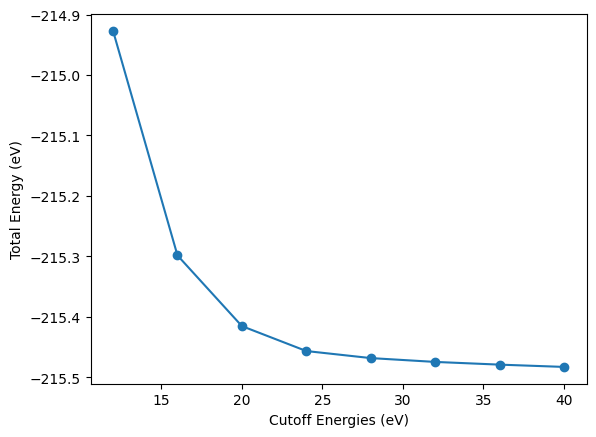

In [ ]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()

ax.plot(cutoff_energies, total_energies,'o-')
ax.set_xlabel('Cutoff Energies (eV)')
ax.set_ylabel('Total Energy (eV)')

# Lattice parameter

In [ ]:
import numpy as np
# create a list for lattice constants to be tested
lattice_constants = np.arange(9.5,11.1,0.1)
# find the "lattice constant" line in the input file
lat_cons_index = qe_input.find('celldm(1) =') + 11

total_energies = []
for constant in lattice_constants:
  # update the input file with the new lattice constant
  new_input_file = qe_input[:lat_cons_index] + str(constant) + qe_input[lat_cons_index+4:]
  # overwrite the input file
  with open("si.scf.in", "w") as f:
    f.write(new_input_file)

  ! /content/q-e/bin/pw.x  -in si.scf.in > si.scf.out # run the DFT input file

  output = ase.io.read("/content/silicon/si.scf.out") # read the output file

  total_energies.append(output.get_total_energy()) # record the calculated total energy

# computation time: 10 seconds

Text(0, 0.5, 'Total Energy (eV)')

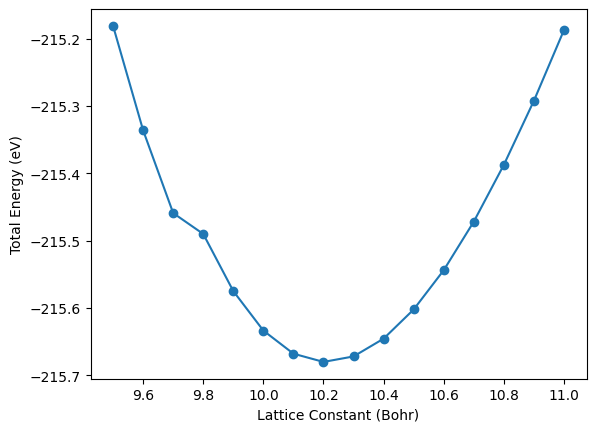

In [ ]:
fig,ax = plt.subplots()

ax.plot(lattice_constants, total_energies,'o-')
ax.set_xlabel('Lattice Constant (Bohr)')
ax.set_ylabel('Total Energy (eV)')

# k-points

In [ ]:
import numpy as np
# create a list for k points to be tested
kpoints = np.arange(1,6,1) # enter kpoints limits
# find the "lattice constant" line in the input file
lat_cons_index = qe_input.find('K_POINTS') + 20

total_energies = []
for k in kpoints:
  # update the input file with the new lattice constant
  new_input_file = qe_input[:lat_cons_index] + str(k).ljust(2) + str(k).ljust(2) + str(k).ljust(2) + qe_input[lat_cons_index+8:]
  # overwrite the input file
  with open("si.scf.in", "w") as f:
    f.write(new_input_file)

  ! /content/q-e/bin/pw.x  -in si.scf.in > si.scf.out # run the DFT input file

  output = ase.io.read("/content/silicon/si.scf.out") # read the output file

  total_energies.append(output.get_total_energy()) # record the calculated total energy

# computation time: 10 seconds

Text(0, 0.5, 'Total Energy (eV)')

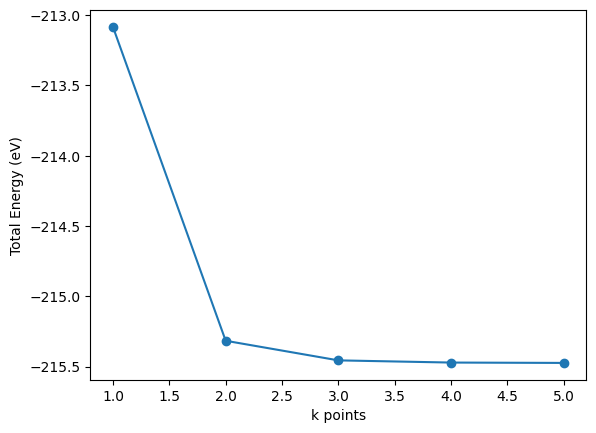

In [ ]:
fig,ax = plt.subplots()

ax.plot(kpoints, total_energies,'o-')
ax.set_xlabel('k points')
ax.set_ylabel('Total Energy (eV)')